In [23]:
import json 

In [24]:
DIR_PATH = "/Users/given/projects/sound-symbolism/results/logit_lens"

# field
WORD_GROUP = "common"
IS_CORRECT = "is_correct"
PROBS = "probs"

# input type
ORIGINAL = "original"
AUDIO = "audio"
IPA = "ipa"
ORIGINAL_AND_AUDIO = "original_and_audio"
IPA_AND_AUDIO = "ipa_and_audio"

In [25]:
def load_logit_lens_file(input_type):
    file_path = f"{DIR_PATH}/{input_type}_common.json"
    with open(file_path, 'r') as file:
        logit_lens_results = json.load(file)
    
    return logit_lens_results

In [26]:
original_file = load_logit_lens_file(ORIGINAL)
ipa_file = load_logit_lens_file(IPA)
audio_file = load_logit_lens_file(AUDIO)
original_and_audio_file = load_logit_lens_file(ORIGINAL_AND_AUDIO)
ipa_and_audio_file = load_logit_lens_file(IPA_AND_AUDIO)


print(len(original_file))
print(len(ipa_file))
print(len(audio_file))
print(len(original_and_audio_file))
print(len(ipa_and_audio_file))

31995
32071
31709
31132
27053


In [27]:
# intersection keys for all 
intersection_keys = list(
    set(original_file.keys()) & set(ipa_file.keys()) & set(audio_file.keys()) & set(original_and_audio_file.keys()) 
    & set(ipa_and_audio_file.keys())
)
len(intersection_keys)

25742

In [28]:
def format_results(logit_lens_results, keys):
    out = {}
    
    for key in keys:
        is_correct = None
        probs = []
        for layer_id, v in logit_lens_results[key].items():
            if isinstance(v, bool): 
                is_correct = v
            else:
                probs.append(v["choice"]["prob"])
        
            out[key] = {
                IS_CORRECT: is_correct,
                PROBS: probs,
            }
    
    return out
    

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def plot_probs_by_key(total_results, key, input_type, log_scale=False):
    result = total_results[key]
    
    is_correct = result[IS_CORRECT]
    probs = result[PROBS]
    
    lang, word, dim = key.split("_")
    title = f"{word} ({lang})  : {input_type} : {is_correct}"
    
    data = np.array(probs)
    y1 = data[:, 0]
    y2 = data[:, 1]
    x = np.arange(len(y1))
    
    # Pick colors for each curve
    color1 = 'red'
    color2 = 'blue'
    
    plt.figure(figsize=(5, 2))
    
    # Plot curves
    plt.plot(x, y1, label=f'{dim.split("-")[0]}', color=color1)
    plt.plot(x, y2, label=f'{dim.split("-")[1]}', color=color2)
    # plt.ylim(0, 1.00)
    
    # Max point for y1
    max_idx_y1 = np.argmax(y1)
    max_val_y1 = y1[max_idx_y1]
    plt.scatter(max_idx_y1, max_val_y1, color=color1, s=100, zorder=5)
    plt.text(max_idx_y1, max_val_y1, f"{max_val_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Max point for y2
    max_idx_y2 = np.argmax(y2)
    max_val_y2 = y2[max_idx_y2]
    plt.scatter(max_idx_y2, max_val_y2, color=color2, s=100, zorder=5)
    plt.text(max_idx_y2, max_val_y2, f"{max_val_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    # Last point of y1
    last_x1 = x[-1]
    last_y1 = y1[-1]
    plt.scatter(last_x1, last_y1, color=color1, marker='^', s=100, zorder=5)
    plt.text(last_x1, last_y1, f"{last_y1:.3g}",
             color=color1, fontsize=10, ha='left', va='bottom')
    
    # Last point of y2
    last_x2 = x[-1]
    last_y2 = y2[-1]
    plt.scatter(last_x2, last_y2, color=color2, marker='^', s=100, zorder=5)
    plt.text(last_x2, last_y2, f"{last_y2:.3g}",
             color=color2, fontsize=10, ha='left', va='bottom')
    
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    if log_scale:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

In [30]:
original_results = format_results(original_file, intersection_keys)
audio_results = format_results(audio_file, intersection_keys)
original_and_audio_results = format_results(original_and_audio_file, intersection_keys)
ipa_results = format_results(ipa_file, intersection_keys)
ipa_and_audio_results = format_results(ipa_and_audio_file, intersection_keys)

print(len(original_results))
print(len(audio_results))
print(len(original_and_audio_results))
print(len(ipa_results))
print(len(ipa_and_audio_results))


25742
25742
25742
25742
25742


In [31]:
words = []
for key in intersection_keys:
    lang, word, dim = key.split("_")

    is_correct_original = original_results[key][IS_CORRECT]
    is_correct_audio = audio_results[key][IS_CORRECT]
    is_correct_original_and_audio = original_and_audio_results[key][IS_CORRECT]
    
    
    words.append({
        "key": key,
        "word": word,
        "dim": dim,
        "lang": lang,
        ORIGINAL : is_correct_original,
        AUDIO : is_correct_audio,
        ORIGINAL_AND_AUDIO : is_correct_original_and_audio,
        "logits" : {
            ORIGINAL : original_file[key],
            AUDIO: audio_file[key],
            IPA: ipa_file[key],
            ORIGINAL_AND_AUDIO : original_and_audio_file[key],
            IPA_AND_AUDIO : ipa_and_audio_file[key],
        }
    })


In [32]:
import pandas as pd


df = pd.DataFrame(words)
df.head()

,key,word,dim,lang,original,audio,original_and_audio,logits
0,ja_ごりごり_realistic-fantastical,ごりごり,realistic-fantastical,ja,True,False,True,{'original': {'0': {'choice': {'logit': [2.015...
1,ja_ずぼん_structured-disorganized,ずぼん,structured-disorganized,ja,True,False,True,{'original': {'0': {'choice': {'logit': [2.375...
2,ko_찍_tense-relaxed,찍,tense-relaxed,ko,True,True,True,{'original': {'0': {'choice': {'logit': [1.898...
3,fr_fu_inhibited-free,fu,inhibited-free,fr,False,False,False,"{'original': {'0': {'choice': {'logit': [2.0, ..."
4,ko_삭_abrupt-continuous,삭,abrupt-continuous,ko,False,True,True,{'original': {'0': {'choice': {'logit': [1.945...


In [33]:
i = 0

In [34]:
dim_list = list(df["dim"].unique())
dim_list

['realistic-fantastical',
 'structured-disorganized',
 'tense-relaxed',
 'inhibited-free',
 'abrupt-continuous',
 'simple-complex',
 'sharp-round',
 'active-passive',
 'dangerous-safe',
 'good-bad',
 'rugged-delicate',
 'strong-weak',
 'ordinary-unique',
 'exciting-calming',
 'harsh-mellow',
 'fast-slow',
 'hard-soft',
 'pleasant-unpleasant',
 'happy-sad',
 'beautiful-ugly',
 'big-small',
 'interesting-uninteresting',
 'solid-nonsolid',
 'heavy-light',
 'masculine-feminine']

In [35]:
sem_dim = dim_list[4]
print(sem_dim)


def get_keys_by_dim(dim):
    return df[df["dim"] == dim].key.tolist()


keys_sem_dim = get_keys_by_dim(sem_dim)
print(keys_sem_dim)

abrupt-continuous
['ko_삭_abrupt-continuous', 'ko_찍_abrupt-continuous', 'ko_빙_abrupt-continuous', 'ko_문턱_abrupt-continuous', 'ko_차츰차츰_abrupt-continuous', 'en_ish_abrupt-continuous', 'en_zonk_abrupt-continuous', 'ko_비틀_abrupt-continuous', 'fr_splach_abrupt-continuous', 'ko_흔들흔들_abrupt-continuous', 'en_whack_abrupt-continuous', 'ko_푸푸_abrupt-continuous', 'fr_bouf_abrupt-continuous', 'ko_흘깃_abrupt-continuous', 'en_guffaw_abrupt-continuous', 'ko_헐레벌떡_abrupt-continuous', 'ko_졸졸_abrupt-continuous', 'fr_zap_abrupt-continuous', 'ko_흐느적흐느적_abrupt-continuous', 'ja_びしゃびしゃ_abrupt-continuous', 'ja_ぎくり_abrupt-continuous', 'ja_ちゃん_abrupt-continuous', 'en_squab_abrupt-continuous', 'ja_ぽっきり_abrupt-continuous', 'ko_핑_abrupt-continuous', 'ko_쩔쩔_abrupt-continuous', 'ja_あんあん_abrupt-continuous', 'fr_ach_abrupt-continuous', 'ko_땅_abrupt-continuous', 'ko_퉁_abrupt-continuous', 'ko_팽그르르_abrupt-continuous', 'ja_どしん_abrupt-continuous', 'fr_raou_abrupt-continuous', 'ko_지근지근_abrupt-continuous', 'ja_ふっくり_abrupt-conti

index: 1
key: ko_찍_abrupt-continuous


/var/folders/8s/6dl3jx_j0zl4ry0xrd9xnx440000gn/T/ipykernel_39839/1430686597.py:67: UserWarning: Glyph 52237 (\N{HANGUL SYLLABLE JJIG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/given/.virtualenvs/sound-symbolism-3S6odo5d/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52237 (\N{HANGUL SYLLABLE JJIG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


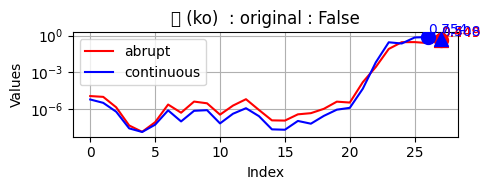

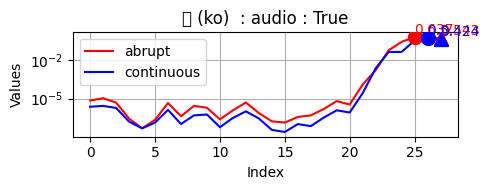

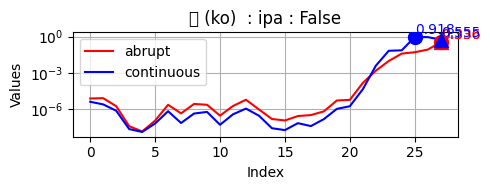

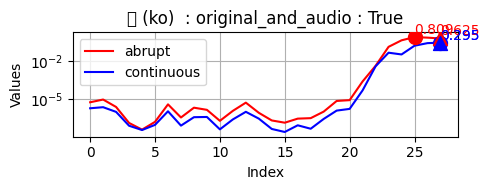

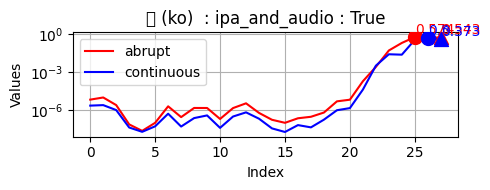

In [36]:
i += 1; key = keys_sem_dim[i]

print(f"index: {i}")
print(f"key: {key}")


log_scale = True
plot_probs_by_key(original_results, key, ORIGINAL, log_scale)
plot_probs_by_key(audio_results, key, AUDIO, log_scale)
plot_probs_by_key(ipa_results, key, IPA, log_scale)
plot_probs_by_key(original_and_audio_results, key, ORIGINAL_AND_AUDIO, log_scale)
plot_probs_by_key(ipa_and_audio_results, key, IPA_AND_AUDIO, log_scale)

In [37]:
len(df)

25742

In [38]:
# df.to_csv('logit_lens_data.csv', index=False)

In [39]:
print(df['dim'].value_counts())



dim
realistic-fantastical        3097
simple-complex               2049
abrupt-continuous            1950
active-passive               1825
strong-weak                  1562
pleasant-unpleasant          1421
structured-disorganized      1379
hard-soft                    1189
heavy-light                  1047
tense-relaxed                 996
solid-nonsolid                988
fast-slow                     984
rugged-delicate               974
good-bad                      846
inhibited-free                841
harsh-mellow                  838
big-small                     673
sharp-round                   664
ordinary-unique               653
exciting-calming              646
beautiful-ugly                336
happy-sad                     308
dangerous-safe                255
masculine-feminine            133
interesting-uninteresting      88
Name: count, dtype: int64


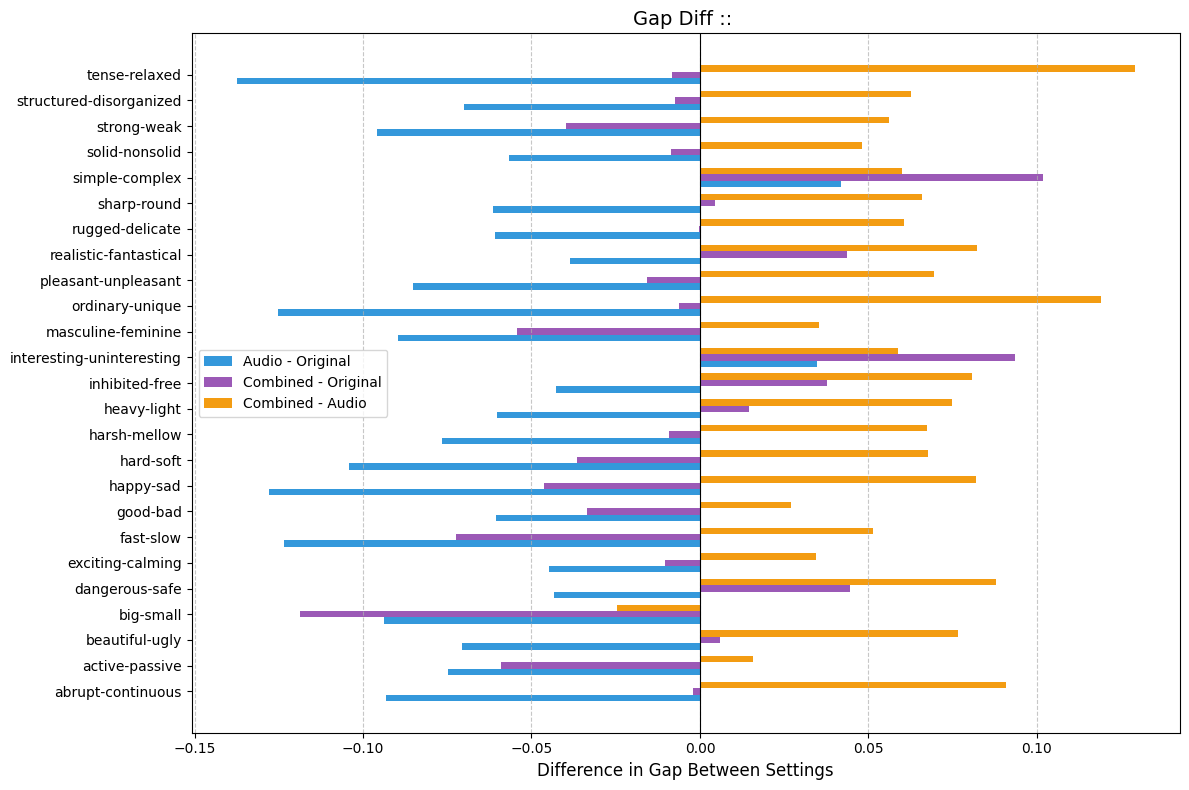

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict


def analyze_semantic_dimension_gaps(df):
    def _calculate_choice_gap(logits):
        """Calculate the absolute gap between two choice probabilities in the final layer."""
        final_layer = max(int(k) for k in logits if k.isdigit())
        probs = logits[str(final_layer)]["choice"]["prob"]
        return abs(probs[0] - probs[1])

    def _initialize_dim_result():
        """Return an initialized result dictionary for a semantic dimension."""
        return {
            'original': [],
            'audio': [],
            'original_and_audio': [],
            'correct_original': 0,
            'correct_audio': 0,
            'correct_original_and_audio': 0,
            'count': 0
        }

    def _update_dim_result(result, row):
        """Update a semantic dimension result entry based on a row of data."""
        result['original'].append(_calculate_choice_gap(row['logits']['original']))
        result['audio'].append(_calculate_choice_gap(row['logits']['audio']))
        result['original_and_audio'].append(_calculate_choice_gap(row['logits']['original_and_audio']))
        result['correct_original'] += int(row['original'])
        result['correct_audio'] += int(row['audio'])
        result['correct_original_and_audio'] += int(row['original_and_audio'])
        result['count'] += 1
        
    def _finalize_dim_statistics(results):
        for dim, val in results.items():
            val['avg_original'] = np.mean(val['original'])
            val['avg_audio'] = np.mean(val['audio'])
            val['avg_original_and_audio'] = np.mean(val['original_and_audio'])
            val['acc_original'] = val['correct_original'] / val['count']
            val['acc_audio'] = val['correct_audio'] / val['count']
            val['acc_original_and_audio'] = val['correct_original_and_audio'] / val['count']

    
    results = defaultdict(_initialize_dim_result)
    for dim, group in df.groupby('dim'):
        for _, row in group.iterrows():
            _update_dim_result(results[dim], row)
    _finalize_dim_statistics(results)
    
    return results


def plot_semantic_dimension_gaps(results, top_n=15):
    df = pd.DataFrame([
        {
            'dim': dim,
            'original': val['avg_original'],
            'audio': val['avg_audio'],
            'original_and_audio': val['avg_original_and_audio'],
            'acc_original': val['acc_original'],
            'acc_audio': val['acc_audio'],
            'acc_original_and_audio': val['acc_original_and_audio'],
            'count': val['count'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']])
        }
        for dim, val in results.items()
    ])
    # df = df.sort_values('avg_gap', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, max(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#e74c3c', '#2ecc71']

    bars = [
        ax.barh(x - width, df['original'], width, label='Original', color=colors[0], alpha=0.8),
        ax.barh(x, df['audio'], width, label='Audio', color=colors[1], alpha=0.8),
        ax.barh(x + width, df['original_and_audio'], width, label='Original+Audio', color=colors[2], alpha=0.8)
    ]

    for i in range(len(df)):
        for j, bar in enumerate([bars[0], bars[1], 
                                 bars[2]]):
            acc_key = ['acc_original', 'acc_audio', 'acc_original_and_audio'][j]
            acc = df.iloc[i][acc_key]
            width = bar[i].get_width()
            x_text = width + 0.01 if width > 0.05 else width + 0.02  # 더 크게 띄움
            ha = 'left' if width > 0.05 else 'right'  # 짧은 경우 오른쪽 정렬
            ax.text(x_text, bar[i].get_y() + bar[i].get_height()/2, f"{acc:.2f}",
                    va='center', ha=ha, fontsize=8, color='black')  # 컬러 고정

    ax.set_xlabel('Average Gap Between Semantic Dimension Choices', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title('Semantic Dimension Gaps Across Settings', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_semantic_dimension_gap_differences(results, top_n=15, lang=""):
    df = pd.DataFrame([
        {
            'dim': dim,
            'audio_vs_original': val['avg_audio'] - val['avg_original'],
            'combined_vs_original': val['avg_original_and_audio'] - val['avg_original'],
            'combined_vs_audio': val['avg_original_and_audio'] - val['avg_audio'],
            'avg_gap': np.mean([val['avg_original'], val['avg_audio'], val['avg_original_and_audio']]),
            'count': val['count']
        }
        for dim, val in results.items()
    ])
    df['abs_audio_vs_original'] = df['audio_vs_original'].abs()
    # df = df.sort_values('abs_audio_vs_original', ascending=False).head(top_n)

    fig, ax = plt.subplots(figsize=(12, min(8, len(df) * 0.4)))
    width = 0.25
    x = np.arange(len(df))
    colors = ['#3498db', '#9b59b6', '#f39c12']

    ax.barh(x - width, df['audio_vs_original'], width, label='Audio - Original', color=colors[0])
    ax.barh(x, df['combined_vs_original'], width, label='Combined - Original', color=colors[1])
    ax.barh(x + width, df['combined_vs_audio'], width, label='Combined - Audio', color=colors[2])

    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.set_xlabel('Difference in Gap Between Settings', fontsize=12)
    ax.set_yticks(x)
    ax.set_yticklabels(df['dim'], fontsize=10)
    ax.set_title(f'Gap Diff :: {lang.upper()}', fontsize=14)
    ax.legend()
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Example usage:
top_n = 25
result = analyze_semantic_dimension_gaps(df)
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n)

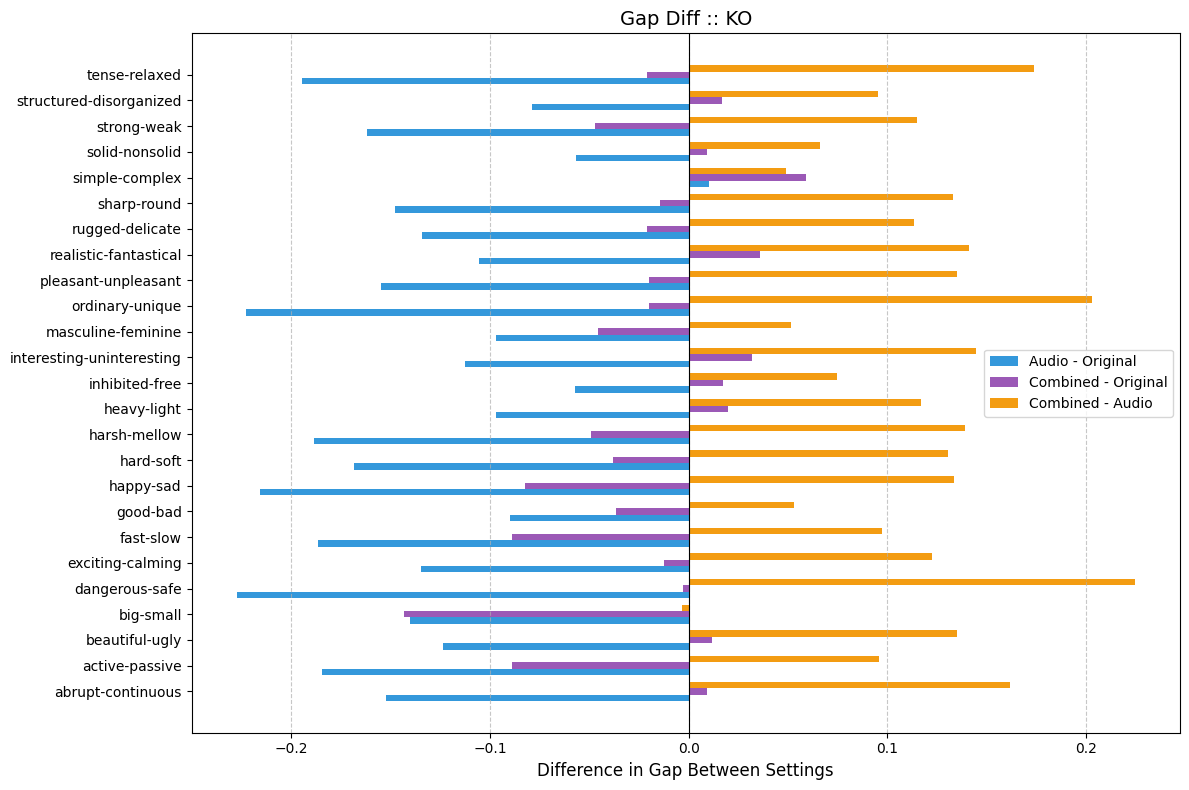

In [41]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'ko'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='ko')

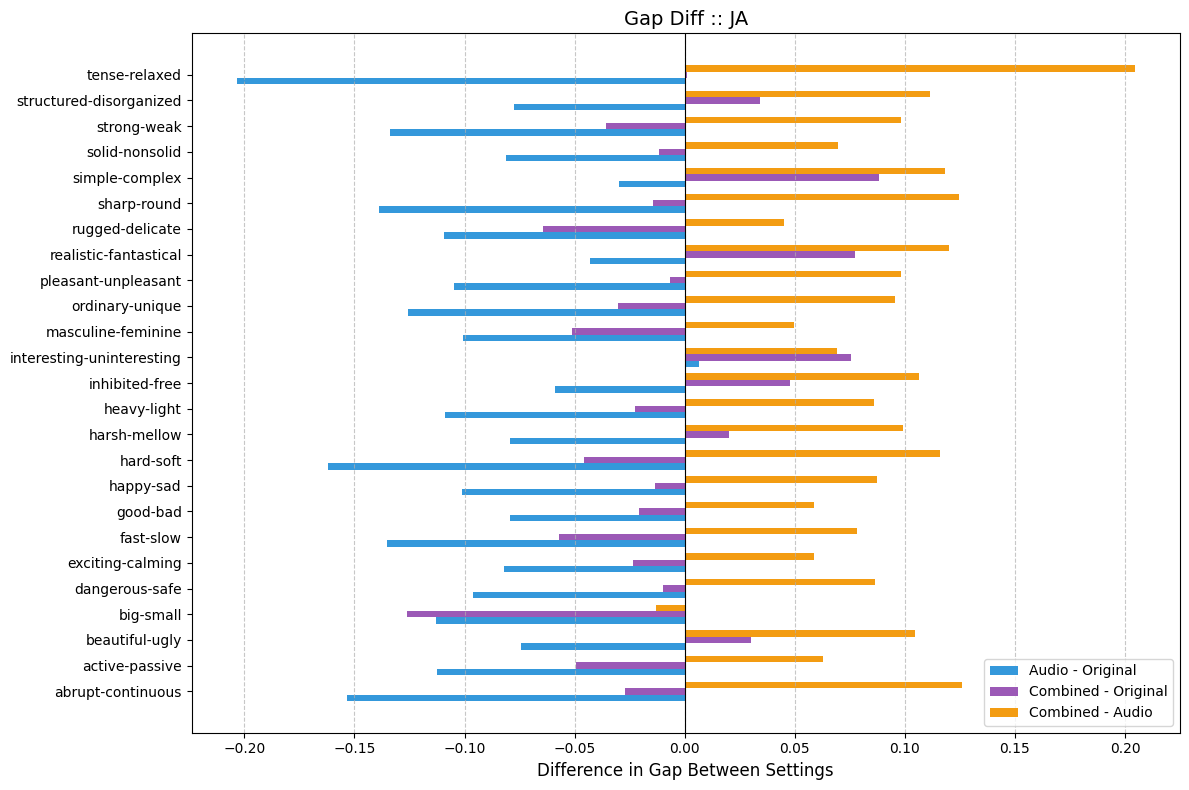

In [42]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'ja'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='ja')

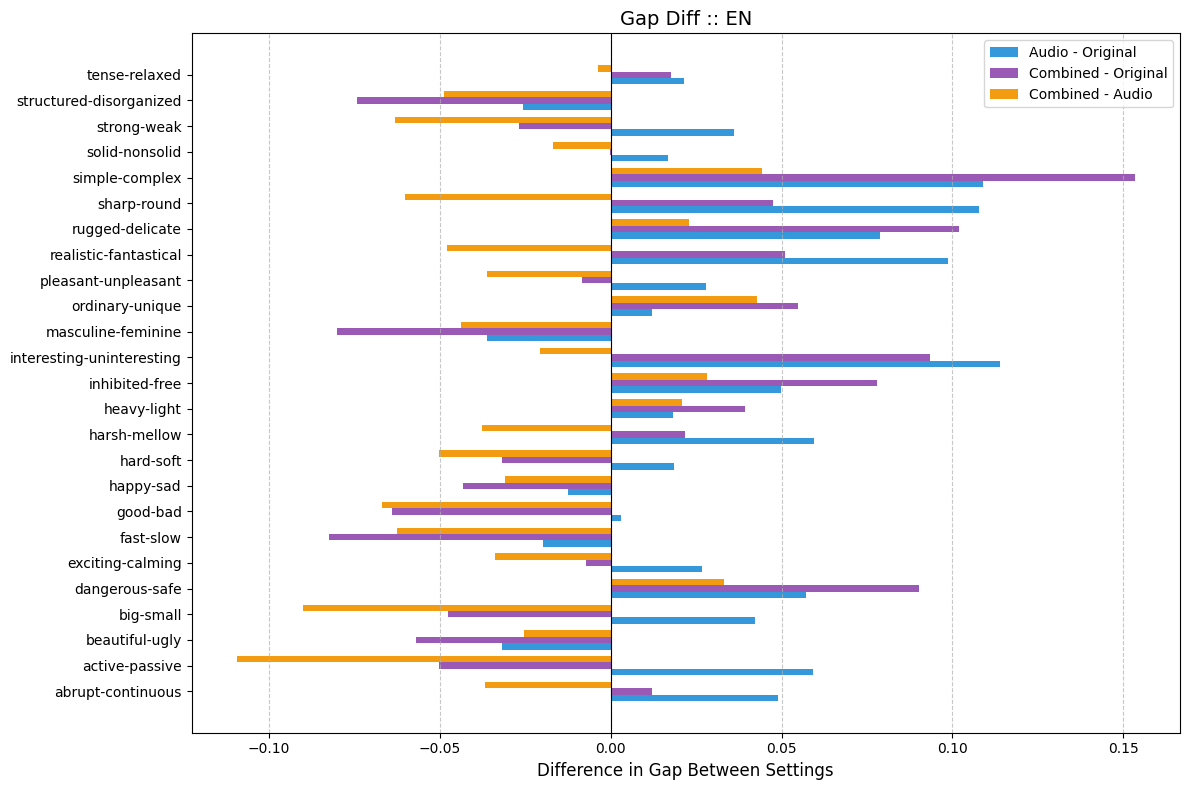

In [43]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'en'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang="en")

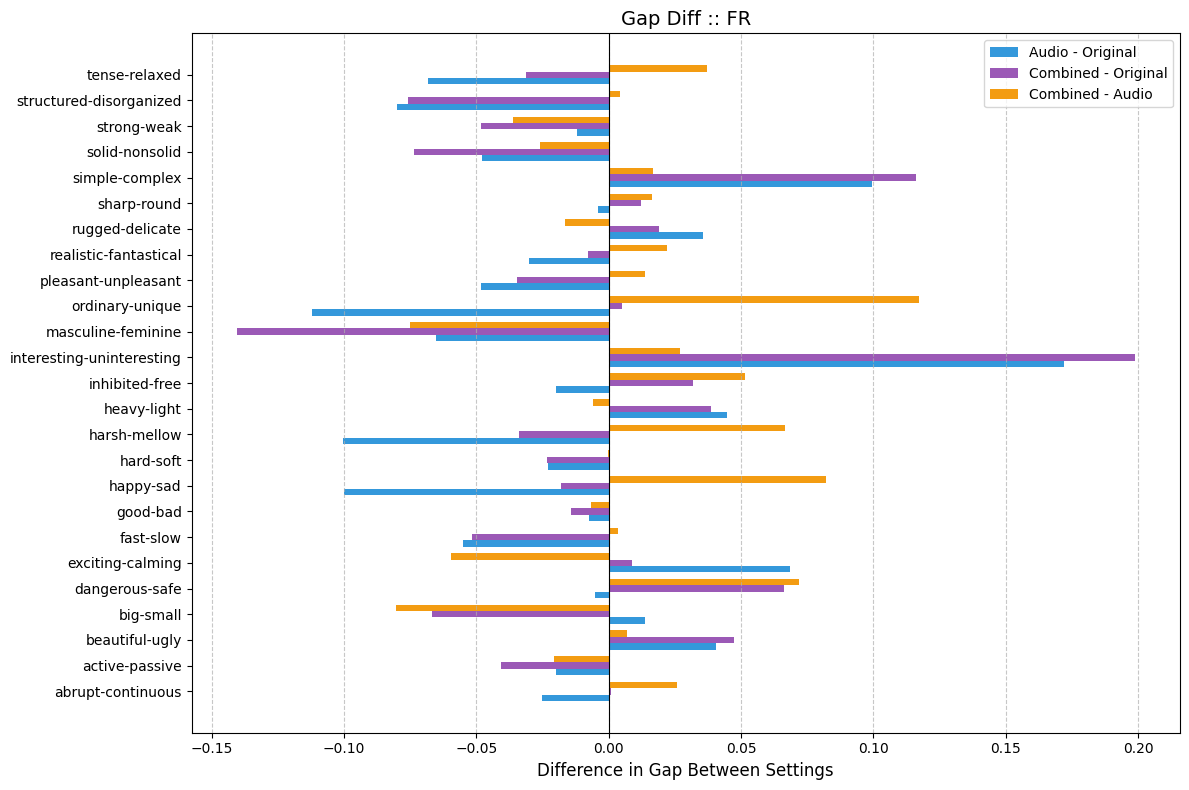

In [44]:
top_n = 25
result = analyze_semantic_dimension_gaps(df[df['lang'] == 'fr'])
# plot_semantic_dimension_gaps(result, top_n)
plot_semantic_dimension_gap_differences(result, top_n, lang='fr')